In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [10]:
df = pd.read_csv('stats.csv', header=0)
df_test = df.iloc[df.win.count()-298:df.win.count()]
df_train = df.iloc[0:df.win.count()-298]
df_train = df_train.sort_values(by=['win'])


train_x=df_train.iloc[:,9:12].values
train_y=df_train.iloc[:,1].values
test_x=df_test.iloc[:,9:12].values
test_y=df_test.iloc[:,1].values


#df_train.count()

In [21]:
class AdalineGD(object):
    
    def __init__(self, rychlost_ucenia=0.0001,pocet_iteracii = 100):
        self.rychlost_ucenia = rychlost_ucenia
        self.pocet_iteracii = pocet_iteracii
        
    def fit(self,X,y):
        
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_=[]
        
        for i in range (self.pocet_iteracii):
            output = self.net_input(X)       
            errors = (y-output)
            self.w_[1:] += self.rychlost_ucenia * X.T.dot(errors)
            self.w_[0] += self.rychlost_ucenia * errors.sum()
            cost = (errors ** 2).sum()/2.0
            self.cost_.append(cost)
        plt.plot(self.cost_)
        return self
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def linearna_aktivacia(self,X):
        return self.net_input(X)
    
    
    def predikcia(self,X):
        print(self.linearna_aktivacia(X))
        return np.where(self.linearna_aktivacia(X)>=0.5,1,0)

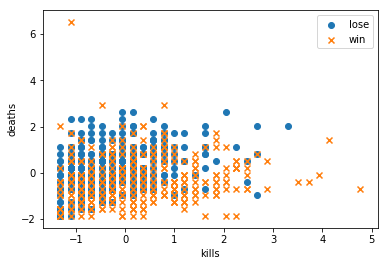

In [22]:
#vykreslime iba 100 udajov pre vacsiu prehladnost
plt.scatter(train_x[0:348, 0], train_x[0:348, 1], marker='o', label='lose')
plt.scatter(train_x[348:700, 0], train_x[348:700, 1], marker='x', label='win')
plt.xlabel('kills')
plt.ylabel('deaths')
plt.legend()

In [23]:
#neskalovane data
#moj_adaline = AdalineGD()
#moj_adaline.fit(train_x,train_y)

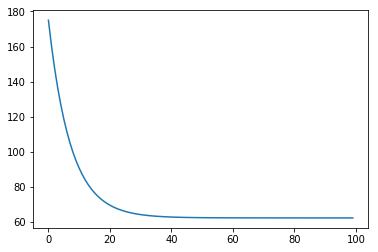

In [24]:
#skalovane data
train_x = preprocessing.scale(train_x)
test_x = preprocessing.scale(test_x)

moj_adaline = AdalineGD()
moj_adaline.fit(train_x,train_y)

In [25]:
uspesnost= moj_adaline.predikcia(test_x)
print(test_y)
print(uspesnost)
print('Presnosť siete je: ', accuracy_score(test_y, uspesnost)*100,"%")

[ 0.42678544  0.35180732  0.74788669  0.49411188  0.32877114  0.42234894
  0.97134128  0.26408979  0.58537486  0.65076344  0.57404059  0.63802403
 -0.08642199  0.28873356  0.54392283  0.28023752  0.26569739  0.82832949
  1.00378318  0.28731911  0.81024391  0.6213529   0.74292678  0.98711205
  0.34917155  0.49784115  0.367064    0.26356639  0.14218564  0.56181528
  0.17301063  0.26003025  0.25365589  0.10922965  0.18028536  0.77890482
  0.75959791  0.8866458   0.76880119  0.64651076  0.6918852   0.58627523
  0.47621943  0.2118269   0.58859004  0.50137729  0.23132694  0.41526735
  0.34048237  0.31460797  0.73032451  0.19426472  0.168381    0.94295892
  0.57830259  0.53184396  0.27772957  0.61813772  0.86888117 -0.05275877
  0.24921939  0.21838508  0.16007809  0.3461495   0.78314818  0.79538282
  0.8657313   0.56162214  0.61992913  0.44751612  0.31441483  0.13278923
  0.78953186  0.39345249  0.53504051  0.83329872  0.19019586  0.5256441
  0.82833881  0.74910801 -0.20285215  0.23132694  0.